<a href="https://colab.research.google.com/github/Rizky28eka/Kumpulan-Tugas-Kuliah-Amikom/blob/main/Prediksi_Depresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from datetime import datetime

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## **DATA WRANGLING**

### **Gathering Data**

In [ ]:
url = "https://drive.google.com/file/d/1vKu1djeH2zE5ay-bTWSmJY-biqYn9eZz/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
depresi_df = pd.read_csv(path)
depresi_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### **Assessing Data**

In [ ]:
depresi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
print(f"Jumlah data null: {depresi_df.isna().sum().sum()}")
print(f"Jumlah data duplikat: {depresi_df.duplicated().sum()}")

Jumlah data null: 1
Jumlah data duplikat: 0


### **Data Cleaning**

In [ ]:
# buang nilai null
depresi_df.dropna(inplace=True)
depresi_df.shape[0]

100

In [ ]:
# ganti nama kolom
new_columns = ["timestamp", "gender", "age", "course", "current_year_study", "CGPA", "married", "depression", "anexity", "panic_attack", "treatment"]

depresi_df.columns = new_columns
depresi_df.head()

,timestamp,gender,age,course,current_year_study,CGPA,married,depression,anexity,panic_attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
# bersihkan beberapa data
depresi_df['current_year_study'] = depresi_df['current_year_study'].apply(
    lambda x: re.sub(r'year', '', x, flags=re.IGNORECASE).strip()
)
depresi_df['current_year_study'] = depresi_df['current_year_study'].astype(float)

In [ ]:
# buang jam
depresi_df['timestamp'] = depresi_df['timestamp'].apply(
    lambda x: x.split(' ')[0]
)

# perbaiki timestamp format
depresi_df['timestamp'] = depresi_df['timestamp'].apply(
    lambda x: datetime.strptime(x, '%d/%m/%Y').strftime('%Y-%m-%d')
)

# ubah tipe data ke dalam datime
depresi_df['timestamp'] = pd.to_datetime(depresi_df['timestamp'])
depresi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           100 non-null    datetime64[ns]
 1   gender              100 non-null    object        
 2   age                 100 non-null    float64       
 3   course              100 non-null    object        
 4   current_year_study  100 non-null    float64       
 5   CGPA                100 non-null    object        
 6   married             100 non-null    object        
 7   depression          100 non-null    object        
 8   anexity             100 non-null    object        
 9   panic_attack        100 non-null    object        
 10  treatment           100 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 9.4+ KB


In [ ]:
# encode
le = LabelEncoder()

for col in ['gender', 'CGPA', 'married', 'depression', 'anexity', 'panic_attack', 'treatment']:
    depresi_df[col] = le.fit_transform(depresi_df[col])

In [ ]:
# standarisasi age
std = StandardScaler()
depresi_df['age'] = std.fit_transform(depresi_df[['age']])

In [ ]:
depresi_df.tail()

,timestamp,gender,age,course,current_year_study,CGPA,married,depression,anexity,panic_attack,treatment
96,2020-07-13,0,0.189229,BCS,1.0,4,0,0,1,0,0
97,2020-07-13,1,-1.018614,Engineering,2.0,3,0,1,1,0,0
98,2020-07-13,0,-0.616000,Nursing,3.0,4,1,1,0,1,0
99,2020-07-13,0,0.994457,Pendidikan Islam,4.0,4,0,0,0,0,0
100,2020-07-18,1,-0.213386,Biomedical science,2.0,3,0,0,0,0,0


## **EDA**

* Bagaimana distribusi data depresi dan tidak depresi pada dataset?
* Dominan data laki-laki atau permepuan pada data tersebut?

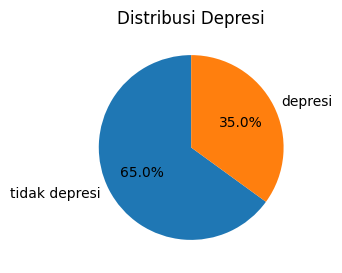

In [ ]:
gender_counts = depresi_df['depression'].value_counts()
plt.figure(figsize=(5, 3))
plt.pie(gender_counts, labels=['tidak depresi', 'depresi'], autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Depresi')
plt.show()

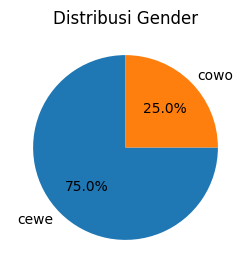

In [ ]:
gender_counts = depresi_df['gender'].value_counts()
plt.figure(figsize=(5, 3))
plt.pie(gender_counts, labels=['cewe', 'cowo'], autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.show()

## **FEATURE SELECTION**

In [ ]:
depresi_df.drop(columns=['timestamp','course'], inplace=True)

In [ ]:
depresi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              100 non-null    int64  
 1   age                 100 non-null    float64
 2   current_year_study  100 non-null    float64
 3   CGPA                100 non-null    int64  
 4   married             100 non-null    int64  
 5   depression          100 non-null    int64  
 6   anexity             100 non-null    int64  
 7   panic_attack        100 non-null    int64  
 8   treatment           100 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.8 KB


In [ ]:
X = depresi_df.drop('depression', axis=1)
y = depresi_df['depression']

# Pilih k fitur terbaik
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

# Tampilkan skor setiap fitur
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Skor setiap fitur:")
print(scores)

# Pilih fitur terbaik
selected_features = X.columns[selector.get_support()].tolist()
print("\nFitur terbaik:")
print(selected_features)

Skor setiap fitur:
              Feature      Score
4             married  53.642105
7           treatment  13.179310
5             anexity   7.704585
6        panic_attack   6.150106
0              gender   1.768795
1                 age   0.513125
2  current_year_study   0.074372
3                CGPA   0.002160

Fitur terbaik:
['gender', 'married', 'anexity', 'panic_attack', 'treatment']


In [ ]:
# UPDATE X
X = depresi_df[selected_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Jumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji: {len(X_test)}")

Jumlah Data Latih: 80
Jumlah Data Uji: 20


## **MODELING**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

## **EVALUASI MODEL**

In [ ]:
y_pred = svc.predict(X_test)
print(f"Akurasi:{ accuracy_score(y_test, y_pred) : .2f}")

Akurasi: 0.85


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20



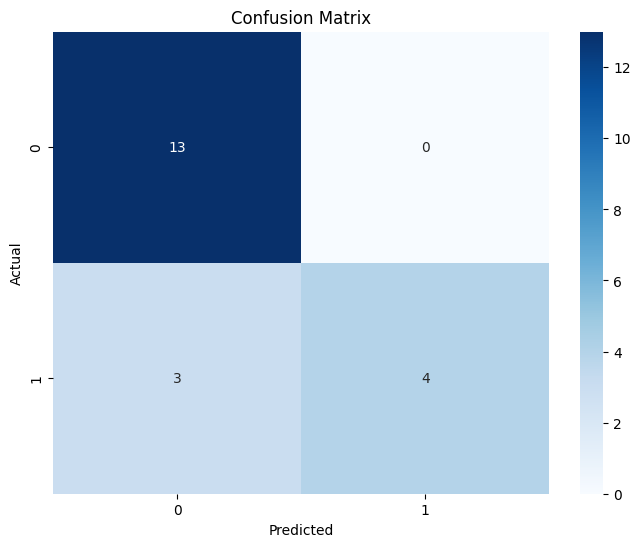

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **EXPORT MODEL**

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(svc, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(std, file)